# Задание 1

## Подпункт 1.1 

In [1]:
import random
from matplotlib import pyplot as plt
import scipy.stats as stats
import scipy
import numpy as np

Датчик Бернулли

In [2]:
def Bernoulli(p, n = 1):
    # можно сломать [VS]
    # теперь нет [AG]
    if (p < 0) or (p > 1):
        print('Incorrect value of p')
        return -1
    x = stats.uniform.rvs(size = n)
    return (x > 1 - p)

In [3]:
N = 10000

In [4]:
p = 0.5
X = Bernoulli(p, N)

In [5]:
sum(X) / len(X)

0.5031

Покажем, что наш датчик работает, сравнив с библиотечным генератором

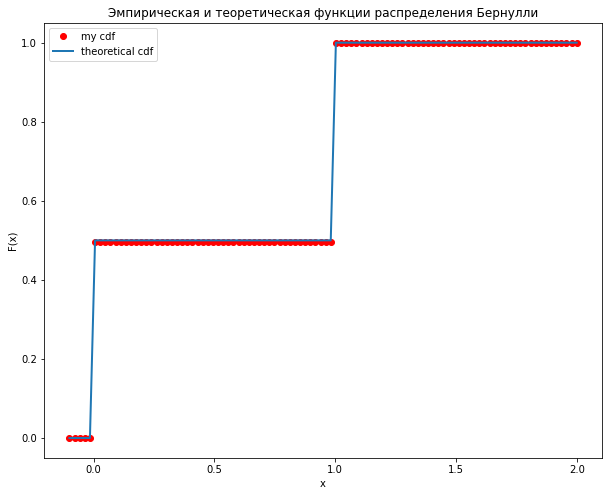

In [6]:
plt.figure(figsize=(10,8))
grid = np.linspace(-0.1, 2, 100)

# empirical
emp_cdf = [ (X < y).sum()/N for y in grid]
plt.plot(grid, emp_cdf, 'ro', label='my cdf', lw=2)

# theoretical
theoretical_cdf = stats.bernoulli.cdf(grid, p) 
plt.plot(grid, theoretical_cdf, label='theoretical cdf', lw=2)

plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Эмпирическая и теоретическая функции распределения Бернулли')

plt.legend();

In [7]:
stats.bernoulli.rvs(0.5)

1

Датчик биномиальной св


In [8]:
def Binom(n, p, size = 1):
    return np.array(Bernoulli(p, n * size)).reshape(size, n).sum(axis = 1) 

In [9]:
p = 0.6
n = 10
N_tries = 10000
X = Binom(n, p, N_tries)

Проверка корректности работы

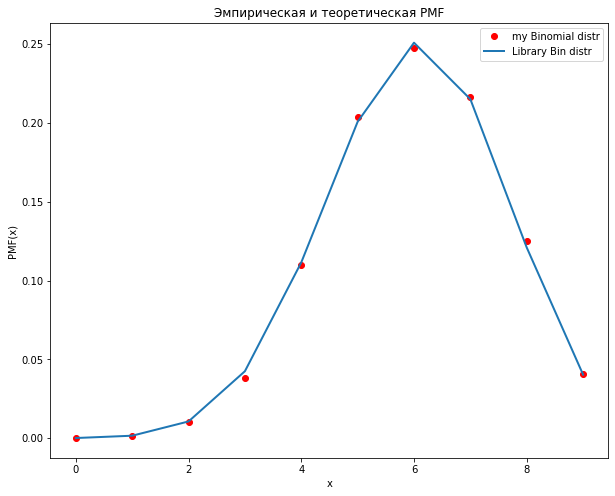

In [10]:
plt.figure(figsize=(10,8))
grid = np.arange(0, n, 1)

emp_pmf = [(X == y).sum()/N_tries for y in grid]
plt.plot(grid, emp_pmf, 'ro', label='my Binomial distr', lw=2)

LibBin = stats.binom.pmf(grid, n, p)   
plt.plot(grid, LibBin, label='Library Bin distr', lw=2) 

plt.xlabel('x')
plt.ylabel('PMF(x)')
plt.title('Эмпирическая и теоретическая PMF')

# Тавтология: напишите, что такое PMF и поймёте, где она [VS]


plt.legend();

## Задание 1.2. Геометрическое распределение

In [11]:
def GeomDistr(p, size = 1):
    # по условию датчик должен генерировать как минимум вектор произвольной размерности [VS]
    # Сделал [AG]
    res = np.zeros(size)
    delta = np.ones(size)
    while any(delta):
        x = Bernoulli(p, size)
        res += delta
        delta[x > 0.5] = 0
        
    return res

In [12]:
p = 0.3
N_tries = 100000
X = GeomDistr(p, N_tries)

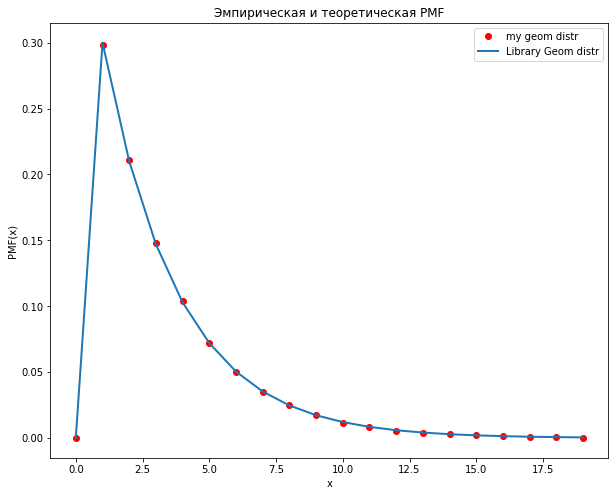

In [13]:
plt.figure(figsize=(10,8))
grid = np.arange(0, 20, 1)

emp_pmf = [(X == y).sum()/N_tries for y in grid]
plt.plot(grid, emp_pmf, 'ro', label='my geom distr', lw=2)

LibBin = stats.geom.pmf(grid, p)   
plt.plot(grid, LibBin, label='Library Geom distr', lw=2) 

plt.xlabel('x')
plt.ylabel('PMF(x)')
plt.title('Эмпирическая и теоретическая PMF')


plt.legend();

Свойство отсутствия памяти $\xi \sim Geom(p)$ означает, что ${\mathbb {P} (X>m+n\mid X\geq m)=\mathbb {P} (X>n)\;,\forall m,n\in \mathbb {N} \cup \{0\}}$

_у вас тильда съехала_ [VS]

In [14]:
m = 5
X = np.array(X)
Y = X[X > m]
N_cond = len(Y)
Y

array([ 8.,  6.,  8., ..., 12., 11., 10.])

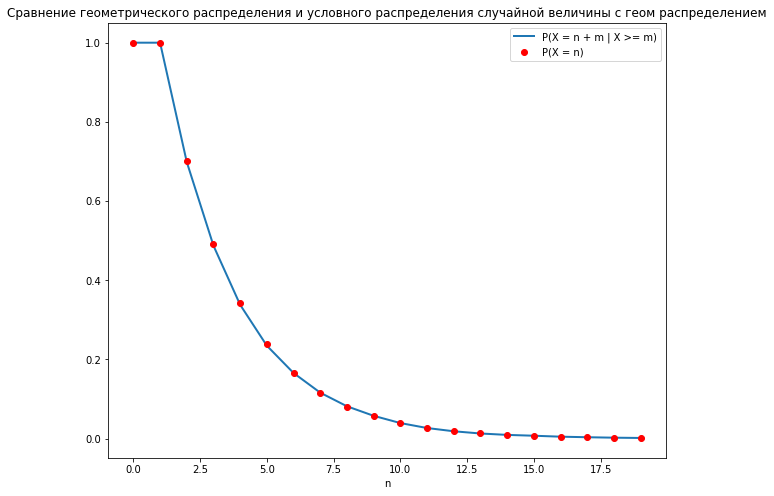

In [15]:
plt.figure(figsize=(10,8))
grid = np.arange(0, 20, 1) # 0,1,2,... 19

cond_pmf = [(Y >= y + m).sum()/(N_cond) for y in grid]
plt.plot(grid, cond_pmf, label='P(X = n + m | X >= m)', lw=2)

emp_pmf = [(X >= y).sum()/N_tries for y in grid]
plt.plot(grid, emp_pmf, 'ro', label='P(X = n)', lw=2)

plt.xlabel('n')
plt.title('Сравнение геометрического распределения и условного распределения случайной величины с геом распределением')


plt.legend();

## Задание 1.3

In [16]:
import math

In [17]:
def GameTry(p):
    if Bernoulli(p):
        return 1
    else:
        return -1

In [18]:
# returns array of S(n)
def Game(p, n):
    S = np.array([GameTry(p) for _ in range(n)])
    S = np.array([sum(S[:i]) for i in range(n)])
    return S

In [19]:
p = 0.5
n = 1000
S = Game(p, n)
Y = S / math.sqrt(n)


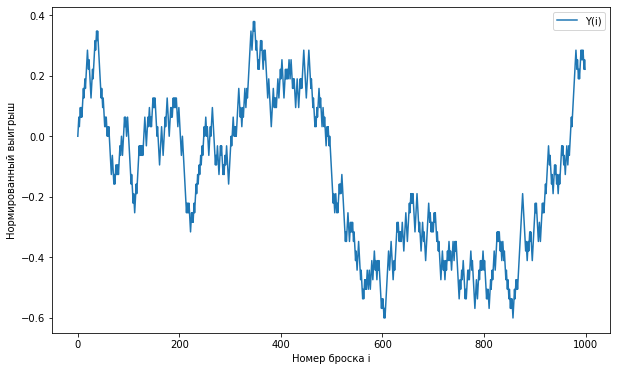

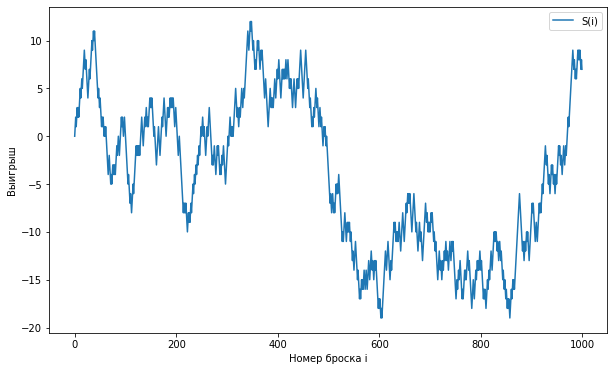

In [20]:
plt.figure(figsize=[10, 6])
plt.plot(Y, label = 'Y(i)')
plt.xlabel('Номер броска i')
plt.ylabel('Нормированный выигрыш')
plt.legend()

plt.figure(figsize=[10, 6])
plt.plot(S, label = 'S(i)')
plt.xlabel('Номер броска i')
plt.ylabel('Выигрыш')
plt.legend()


$\xi_i$ имеет следующее распределение $\mathcal{P}(\xi_i=1)=\mathcal{P}(\xi_i=-1)=\frac{1}{2}$

$E(\xi_i)=0, var \xi_i = 1$
При этом $\xi_i$ независимы, следовательно по ЦПТ $\frac{S_n}{\sqrt{n}}$ сходится по распределению к стандартному нормальному распределению

### Комментарии проверяющего

1. Написано грязно: сокращения в духе геом и проблемы с вёрсткой. Не очень критично, но создаётся впечатление, что сделано _на отвали_.
2. А вот что критично, так это несоответствие датчика для геометрического распределения условию (посмотрите ещё и dropbox paper).

**не зачтено**

# Задание 2

## Подпункт  2.1

Будем генерировать равномерное на [0,1] распределение, затем будем считать квантиль соответствующего уровня, т.е. решать уравнение
$K(x)=\xi$, где $\xi \in Uniform[0,1]$

In [21]:
def KantorGen(size = 1):
    eps = 0.001
    k = round(np.log(2/eps) / np.log(3)) + 1
    deg = np.array([np.arange(1, k + 1)])
    deg = np.repeat(deg, size, axis=0)
    bern = np.array(Bernoulli(0.5, k * size)).reshape(size, -1)
    return (np.array(2 / 3**deg)*bern).sum(axis=1)


In [22]:
N_tries = 1000
X = KantorGen(N_tries)

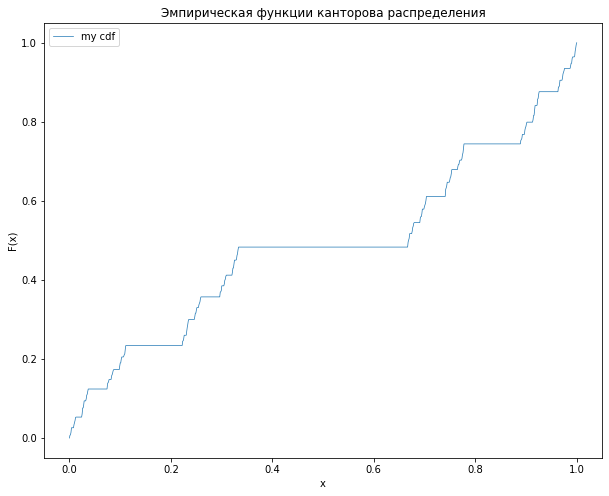

In [23]:
plt.figure(figsize=(10,8))
grid = np.linspace(0, 1, 1000)

# empirical
emp_cdf = [(X < y).sum()/N_tries for y in grid]
plt.plot(grid, emp_cdf, label='my cdf', linewidth=0.7)

plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Эмпирическая функции канторова распределения')


plt.legend();

In [24]:
def KantorFun(x):
    if x <= 0:
        return 0
    elif x >= 1:
        return 1
    else:
        eps = 0.00001
        y = 0
        delta_y = 0.5
        a = 0.
        b = 1.
        while b - a > eps:
            if x >= (2*b+a) / 3:
                y += delta_y
                a = (2*b+a) / 3
            elif x <= (2*a + b) / 3:
                b = (2*a + b) / 3
            else:
                y += delta_y
                return y
            delta_y /= 2
        return y

In [25]:
import scipy.special as special

In [26]:
alpha = 0.05 # уровень значимости

In [27]:
KValues = np.array([KantorFun(tmp) for tmp in grid])


In [28]:
def KolmogApprox(x):
    return 1 - 2 * np.exp(-2 * x**2)

In [29]:
Dn = math.sqrt(N_tries) * max(abs(KValues - emp_cdf))


In [30]:
pval = 1 - KolmogApprox(Dn)
pval

0.5447911223965843

In [31]:
if pval > alpha:
    print('Гипотеза справедлива')
else:
    print('Что-то пошло не по плану...')

Гипотеза справедлива


## Подпункт 2.2

In [32]:
def KSTest(X, Y, a, b, N_tries):
    m = len(Y)
    n = len(X)
    grid = np.linspace(a, b, round(math.sqrt(N_tries)))
    emp_F = np.array([(X < y).sum()/n for y in grid])
    emp_G = np.array([(Y < y).sum()/m for y in grid])

    rho = np.sqrt(m * n / (m + n)) * max(abs(emp_F - emp_G))
    pval = 1 - KolmogApprox(rho)
    return pval

In [33]:
X = np.array(X)
Y = KantorGen(N_tries)
Y = np.ones_like(Y) - Y

In [34]:
alpha = 0.05
pval = KSTest(X, Y, 0, 1, N_tries)
print(pval) # если больше 0.05, то норм)
if pval > alpha:
    print('Супер!')
else:
    print('Ммм...')

0.5472482067408148
Супер!


In [35]:
Y = Y / 3
Z = X[X <= 1/3]

In [36]:
alpha = 0.05
pval = KSTest(Z, Y, 0, 1, N_tries)
print(pval) # если больше 0.05, то норм)
if pval > alpha:
    print('Супер!')
else:
    print('Ммм...')

1.4285283378696731
Супер!


## Подпункт 2.3 

In [37]:
Ns = [2, 10, 100, 1000, 100000]

In [38]:
X = np.array(KantorGen(Ns[-1]))
Var_n = []
M_n = []
for N in Ns:
    currX = X[:N]
    currM = currX.mean()
    currVar = ((currX - currM * np.ones_like(currX))**2).sum() /(N - 1)
    
    M_n.append(currM)
    Var_n.append(currVar)

Информацию о теоретических мат ожидании и дисперсии случайной величины, имеющей распределение Кантора, берём из надёжных источников)
Проиллюстрируем сходимость.

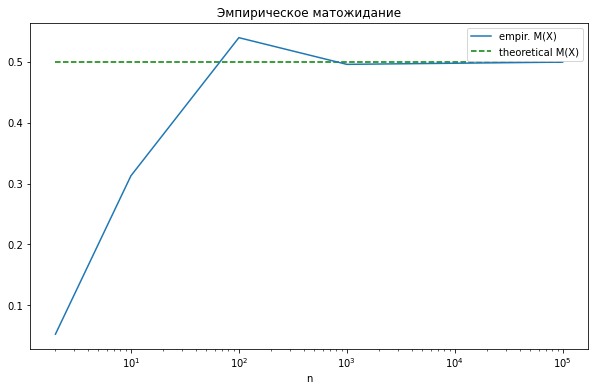

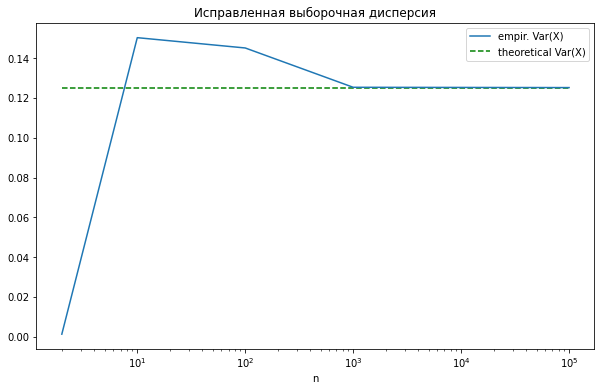

In [39]:
plt.figure(figsize=[10, 6])
plt.plot(Ns, M_n, label='empir. M(X)')
plt.xscale('log')
plt.hlines(0.5, xmin=Ns[0], xmax=Ns[-1], color='green', linestyles='--', label='theoretical M(X)');
plt.xlabel('n')
plt.title('Эмпирическое матожидание')

plt.legend()

plt.figure(figsize=[10, 6])
plt.plot(Ns, Var_n, label='empir. Var(X)')
plt.xscale('log')
plt.xlabel('n')
plt.title('Исправленная выборочная дисперсия')
plt.hlines(1/8, xmin=Ns[0], xmax=Ns[-1], color='green', linestyles='--', label='theoretical Var(X)');
plt.legend()


### Комментарии проверяющего

1. Достаточно трудоёмкая генерация: можно (и нужно) сделать это аналитически, коль скоро вы всё-равно имеете параметр точности. 
2. Аналогично предыдущему заданию, здесь нужна векторность генераторов (у вас её нет)
3. Использование библиотечных тестов Колмогорова и Смирнова -- читы. Нужно реализовывать самому.

**не зачтено**

# Задание 3 

## Подпункт 3.1 

Если $\xi \sim Exp(\lambda)$, то её функция распределения имеет вид $F_{\xi}(x)=\begin{cases}1-e^{-\lambda x}, x \geqslant 0 \\ 0, x < 0 \end{cases}$. Будем генерировать распределение, как и в предыдещем случае, генерируя равномерное, и применяя к результату функцию, обратную к функции распределения нужного нам.

_А где у вас во втором задании обратная функция распределения применяется? [VS]_

_В клеточке под этой [AG]_

In [40]:
def ExpGen(lamb, N=1):
    if lamb <= 0:
        print('Lambda is incorrect (<=0)')
        return 0
    y = stats.uniform.rvs(size = N)
    x = -np.log(1 - y) / lamb # а почему именно 1-y? [VS]
                          # Потому что при решении уравнения F(x) = y так получается, но да, там можно поменять на y)) [AG]
    return x

In [41]:
N_tries = 10000
lamb = 1
X = np.array(ExpGen(lamb, N_tries))

In [42]:
X.mean()

1.01982537499136

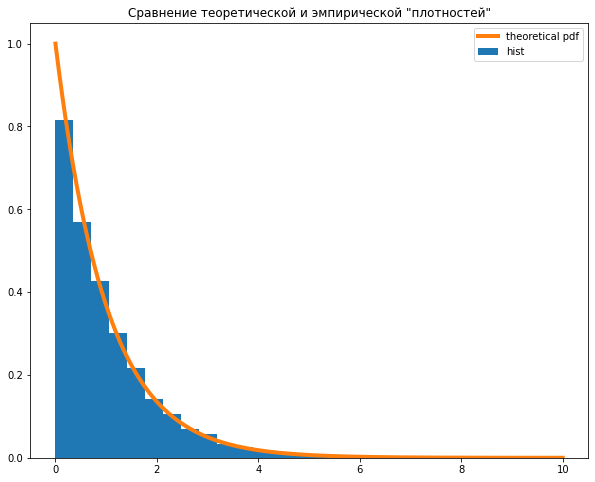

In [43]:
# density

plt.figure(figsize=(10,8))
plt.hist(X, bins=25, density=True, label='hist')#, histtype='step');
grid = np.linspace(0, 10, 1000)

theoretical_pdf = stats.expon.pdf(grid, scale = 1.0 / lamb)
plt.plot(grid, theoretical_pdf, label='theoretical pdf', lw=4)
plt.title('Сравнение теоретической и эмпирической "плотностей"')
plt.legend();

Продемонстрируем отсутствие памяти

In [44]:
m = 4
X = np.array(X)
Y = X[X >= m]
N_cond = len(Y)

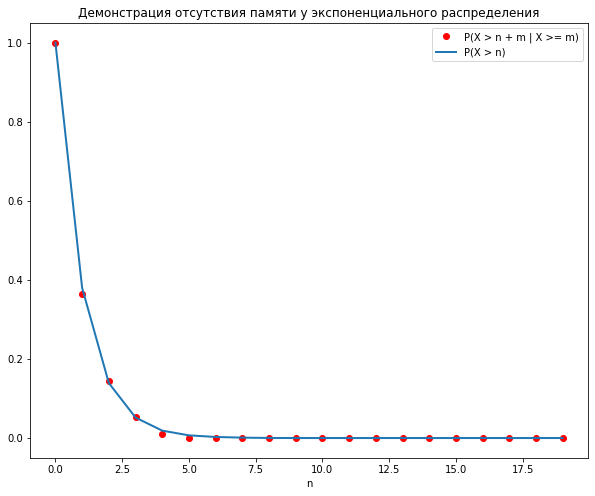

In [45]:
plt.figure(figsize=(10,8))
grid = np.arange(0, 20, 1) # 0,1,2,... 19

cond_pmf = [(Y > y + m).sum()/(N_cond) for y in grid]
plt.plot(grid, cond_pmf, 'ro', label='P(X > n + m | X >= m)', lw=2)

emp_pmf = [(X > y).sum()/N_tries for y in grid]
plt.plot(grid, emp_pmf, label='P(X > n)', lw=2)

plt.xlabel('n')
plt.title('Демонстрация отсутствия памяти у экспоненциального распределения')

plt.legend();

$$X_i \sim Exp(\lambda_i), \lambda_i > 0, i \in [1, N]\\ 
Y = \min\limits_{i} X_i \\
\text{Тогда функция распределения Y имеет вид:}\\
F_{Y}(x) = \mathbb{P}(\min\limits_{i} X_i < x) = 1 - \mathbb{P}(\min\limits_{i} X_i \geqslant x) = 1 - \prod_{i}\mathbb{P}( X_i \geqslant x) = 1 - \prod_{i} (1 - F_{X_i}(x)) = \begin{cases} 1 - e^{-x\sum\limits_{i}\lambda_i}, x > 0\\ 0, x \leqslant 0 \end{cases}
$$

Один из переходов написан не совсем корректно [VS]

## Подпункт 3.2 

$$X_i \sim Exp(\lambda), \lambda > 0, X_i - independent\\
  Y = \max\limits_{n| \sum\limits_{i=1}^n}n\\
  \text{Оказывается, что в таком случае}~~ Y \sim Pois(\lambda)
$$
Эксп распределение моделирует время между двумя последовательными свершениями одного и того же событя, а пуассоновское - количество таких событий за промежуток времени, так что и с точки зрения интерпретации всё логично.)

In [46]:
def PoisGen(lamb, size = 1):
    res = np.zeros(size)
    delta = np.ones(size)
    S = np.array(ExpGen(lamb, size))
    while any(delta):
        delta[S >= 1] = 0
        res += delta
        S += np.array(ExpGen(lamb, size))
    
    return res
    

In [47]:
lamb = 1
N_tries = 10000
X = np.array(PoisGen(lamb, N_tries))

In [48]:
X.mean()

1.0113

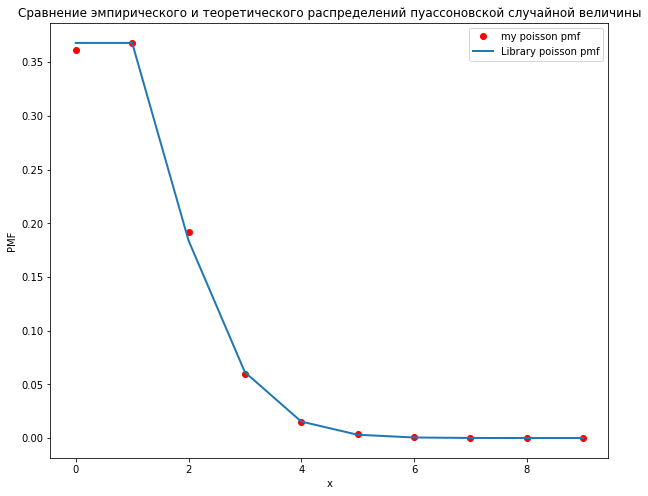

In [49]:
plt.figure(figsize=(10,8))
grid = np.arange(0, 10, 1)

emp_pmf = [(X == y).sum()/N_tries for y in grid]
plt.plot(grid, emp_pmf, 'ro', label='my poisson pmf', lw=2)

LibPois = stats.poisson.pmf(grid, lamb)   
plt.plot(grid, LibPois, label='Library poisson pmf', lw=2) 

plt.xlabel('x')
plt.ylabel('PMF')
plt.title('Сравнение эмпирического и теоретического распределений пуассоновской случайной величины')

plt.legend();

## Подпункт 3.3 

In [50]:
def ApproxPoisWithBin(lamb, size = 1):
    N = 1000 
    return Binom(N, lamb / N, size)

In [51]:
lamb = 1.5
N_tries = 100000
X = np.array(ApproxPoisWithBin(lamb, N_tries))

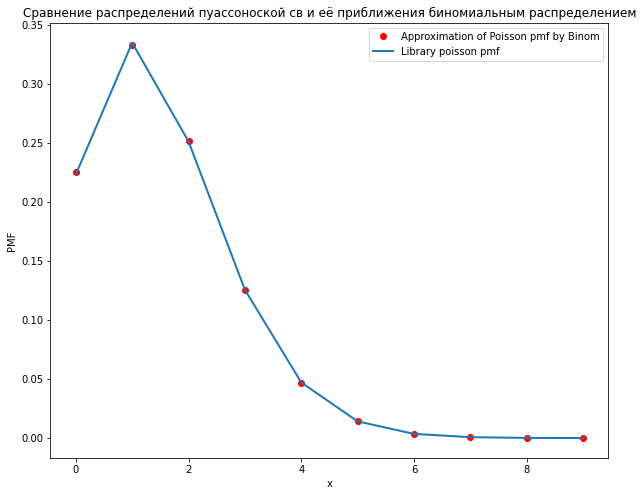

In [52]:
plt.figure(figsize=(10,8))
grid = np.arange(0, 10, 1)

emp_pmf = [(X == y).sum()/N_tries for y in grid]
plt.plot(grid, emp_pmf, 'ro', label='Approximation of Poisson pmf by Binom', lw=2)

LibPois = stats.poisson.pmf(grid, lamb)   
plt.plot(grid, LibPois, label='Library poisson pmf', lw=2) 

plt.xlabel('x')
plt.ylabel('PMF')
plt.title('Сравнение распределений пуассоноской св и её приближения биномиальным распределением')

plt.legend();

In [53]:
from scipy.stats import chi2, t, f

In [54]:
k = 10
grid = np.arange(0, k, 1)
emp_pmf = [(X == y).sum() for y in grid]
emp_pmf.append((X > grid[-1]).sum())
emp_pmf = np.array(emp_pmf)

expected_freqs = list(stats.poisson.pmf(grid, lamb))
expected_freqs.append(1 - stats.poisson.cdf(grid[-1], mu = lamb))
expected_freqs = np.array(expected_freqs)
expected_freqs *= N_tries

rho = ((emp_pmf - expected_freqs)**2 / expected_freqs).sum()

In [55]:
alpha = 0.05

if rho < chi2.ppf(1 - alpha, df = k - 1):
    print('Генерится то, что надо')
else:
    print('Что-то не так...')


Генерится то, что надо


## Подпункт 3.4 

In [56]:
import math

In [57]:
def NormGen(mu, sigma, size = 1):
    r = stats.uniform.rvs(size = size)
    phi = stats.uniform.rvs(size = size)
    
    z0 = np.cos(2 * np.pi * phi) * np.sqrt(-2 * np.log(r))
    z1 = np.sin(2 * np.pi * phi) * np.sqrt(-2 * np.log(r))
    return mu + sigma * z0, mu + sigma * z1 
    

In [58]:
mu = 7
sigma = 2
N_tries = 10000
Pairs = np.array(NormGen(mu, sigma, N_tries))
X = Pairs[0, :]
Y = Pairs[1, :]

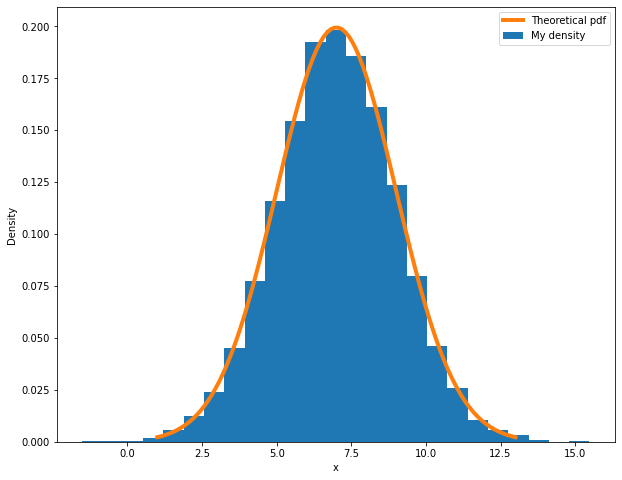

In [59]:
# density

plt.figure(figsize=(10,8))
plt.hist(X, bins=25, density=True, label='My density')
grid = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)

theoretical_pdf = stats.norm.pdf(grid, loc = mu, scale = sigma)
plt.plot(grid, theoretical_pdf, label='Theoretical pdf', lw=4)

plt.xlabel('x')
plt.ylabel('Density')

plt.legend();

In [60]:
alpha = 0.05

n = len(X)
m = len(Y)
VarX = ((X - X.mean() * np.ones_like(X))**2).sum() / (n - 1)
VarY = ((Y - Y.mean() * np.ones_like(Y))**2).sum() / (m - 1) 
rho = np.sqrt(n * m / (n + m)) * (X.mean() - Y.mean()) / np.sqrt( ((n -1) * VarX + (m - 1) * VarY ) / (n + m - 2))

crit_val = t.cdf(rho, n + m - 2)

a = t.ppf(alpha / 2, df = n + m - 2)
b = t.ppf(1 - alpha / 2, df = n + m - 2)

if (a < rho) and (rho < b):
    print('Матожидание равно тому, чему надо)')
else:
    print('Видимо, где-то ошибка...')

Матожидание равно тому, чему надо)


In [61]:
if VarY < 0.001:
    print('Что-то странное, библиотечная функция не пашет')
else:
    F = VarX / VarY
    alpha = 0.05 #Or whatever you want your alpha to be.
    
    a = f.ppf(alpha / 2, dfn = N_tries - 1, dfd = N_tries - 1)
    b = f.ppf(1 - alpha / 2, dfn = N_tries - 1, dfd = N_tries - 1)
    if (F > b) or (F < a):
        print('Что-то тут не так')
    else:
        print('Фишеровский тест дисперсий дал норм результат')


Фишеровский тест дисперсий дал норм результат


### Комментарий проверяющего

1. Снова читы, не надо так.
2. Снова нет векторности, ну вы понимаете.
3. Подпункт 3.4 это интересная альтернатива Боксу-Мюллеру (классическому). В отчёте обязательно приведите оба варианта и объясните, чем они фундаментально отличаются.

**не зачтено**

## Задание 4 

## Подпункт 4.1 

Если $\xi \sim Cauchy(x_0, \gamma),$ то её функция распределения равна $F_{\xi}(x) = \frac{1}{\pi}arctg(\frac{x-x_0}{\gamma}) + \frac{1}{2}$.
Соответстветственно $F_{\xi}^{-1}(y) = x_0 + \gamma tg(\pi (y - \frac{1}{2}))$.
Тогда если $\eta \sim U[0, 1],~~ \xi = F_{\xi}^{-1}(\eta), \text{то} \xi \sim Cauchy(x_0, \gamma)$

In [62]:
def CauchyGen(x_0, gamma, size = 1):
    if gamma <=0:
        print('Incorrect value of scale')
        return 0
    
    y = stats.uniform.rvs(size=size)
    return x_0 + gamma * np.tan(math.pi * (y - 0.5))
        

In [63]:
x_0 = 0
gamma = 1
N_tries = 10000
X = np.array(CauchyGen(x_0, gamma, N_tries))

In [64]:
np.quantile(X, 0.5, interpolation ='lower')

0.00016816980832131428

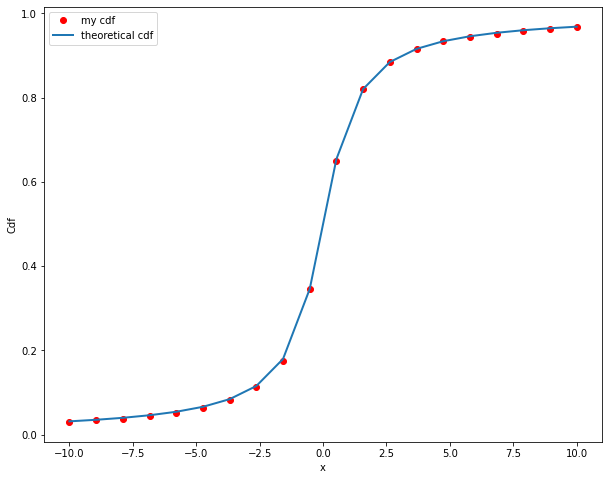

In [65]:
plt.figure(figsize=(10,8))
grid = np.linspace(x_0 - 10, x_0 + 10, 20)

# empirical
emp_cdf = [ (X < y).sum()/N_tries for y in grid]
plt.plot(grid, emp_cdf, 'ro', label='my cdf', lw=2)

# theoretical
theoretical_cdf = stats.cauchy.cdf(grid, x_0, gamma)
plt.plot(grid, theoretical_cdf, label='theoretical cdf', lw=2)

plt.xlabel('x')
plt.ylabel('Cdf')

plt.legend();

# 

## Подпункт 4.2

In [66]:
def NormPolarOptimizeGen(mu, sigma, size = 1):
    eps = 0.0001
    r = stats.uniform.rvs(size = size)
    phi = stats.uniform.rvs(size = size)    
    z0 = np.cos(2 * np.pi * phi) * np.sqrt(-2 * np.log(r))
    z1 = np.sin(2 * np.pi * phi) * np.sqrt(-2 * np.log(r))
    return mu + sigma * z0
    
    

In [67]:
def NeymanNormGen(mu, sigma, size = 1):
    a = np.sqrt(math.exp(1)) / 2
    x = np.array([])
    
    while size > 0:
        curr_x = np.array(CauchyGen(0, 1, size))
        y = stats.uniform.rvs(size = size)
        idx = y < (a * np.exp(-curr_x**2 / 2) * (curr_x**2 + 1))   
        delta_size = sum(idx)
        size -= delta_size
        x = np.concatenate((x, curr_x[idx]), axis = 0)
        
    return mu + sigma * x

In [68]:
mu = 10
sigma = 2
N_tries = 100000
X = np.array(NeymanNormGen(mu, sigma, N_tries))


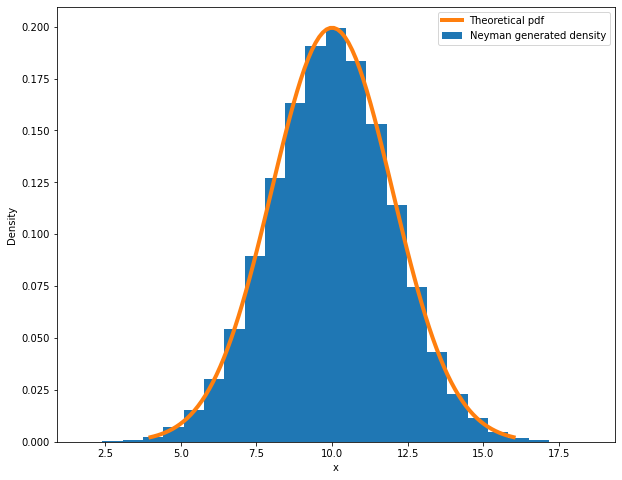

In [69]:
# density

plt.figure(figsize=(10,8))
plt.hist(X, bins=25, density=True, label='Neyman generated density')#, histtype='step');
grid = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)

theoretical_pdf = stats.norm.pdf(grid, loc = mu, scale = sigma)
plt.plot(grid, theoretical_pdf, label='Theoretical pdf', lw=4)

plt.xlabel('x')
plt.ylabel('Density')

plt.legend();

In [70]:
import seaborn as sns


Text(0.5, 1.0, 'Probplot for my Neyman distribution')

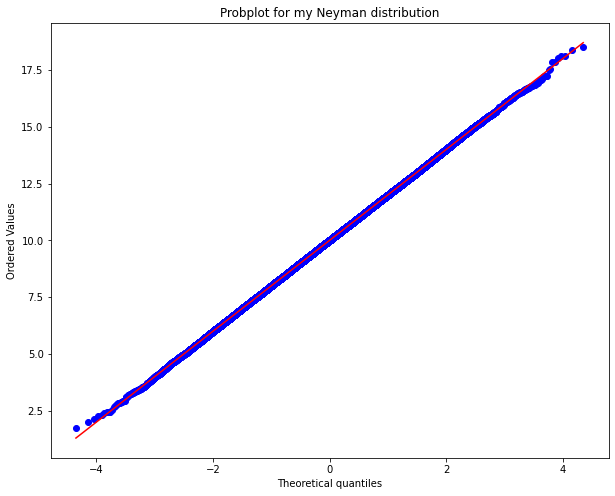

In [71]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
res = stats.probplot(X, plot=ax)
ax.set_title("Probplot for my Neyman distribution")


## Подпункт 4.3 

In [72]:
import time

In [73]:
Ns = [100, 1000, 10000, 100000, 1000000]

polar_times = []
cauchy_times = []

for N in Ns:
    polar_start_time = time.process_time()
    X = NormPolarOptimizeGen(mu, sigma, N)
    polar_end_time = time.process_time()
    polar_times.append(polar_end_time - polar_start_time)
    
    cauchy_start_time = time.process_time()
    X = NeymanNormGen(mu, sigma, N)
    cauchy_end_time = time.process_time()
    cauchy_times.append(cauchy_end_time - cauchy_start_time)

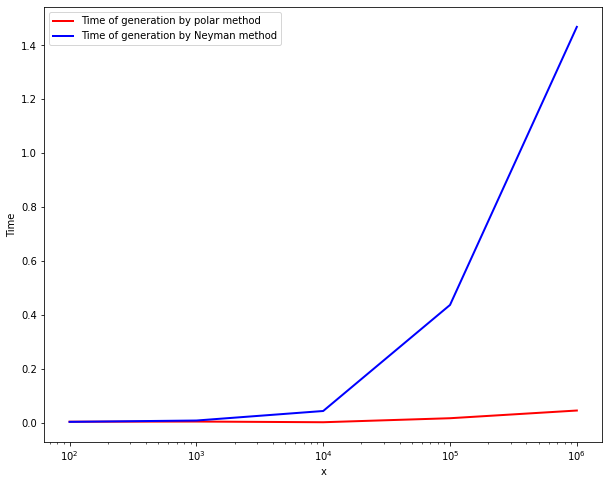

In [74]:
plt.figure(figsize=(10,8))
plt.plot(Ns, polar_times, 'r', label='Time of generation by polar method', lw=2)
plt.plot(Ns, cauchy_times, 'b', label='Time of generation by Neyman method', lw=2)
plt.xscale('log')
plt.xlabel('x')
plt.ylabel('Time')

plt.legend();


Видим, что полярный метод генерируется немного быстрее

# Задание 5

## Подпункт 5.1 

Согласно ЗБЧ в форме Хинчина
$$
\xi_i - iid, \xi_i \sim N(\mu, \sigma^2), i = 1, 2,...\\
\exists \mathbb{E}\xi_i = \mu < \infty
~~\text{следовательно} ~\frac{S_n}{n} \overset{\mathbb{P}}{\to} \mu
\\
\text{т.е.} ~ \forall \varepsilon > 0~~~ \mathbb{P}(|\frac{S_n}{n}-\mu| \geqslant \varepsilon) \underset{n \to \infty}{\to} 0
$$

In [75]:
N = 10000
mu = 1
scale = 10
X = stats.norm.rvs(loc = mu, scale = scale, size=N)

In [76]:
Y = np.array([X[:i].mean() for i in range(1, N)]) # Y_n = S_n / n   

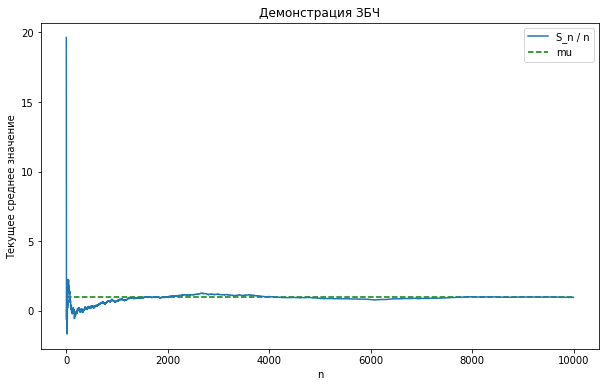

In [77]:
plt.figure(figsize=[10, 6])
plt.plot(Y, label = 'S_n / n')
plt.xlabel('n')
plt.ylabel('Текущее среднее значение')
plt.legend()

plt.hlines(mu, xmin=0, xmax=N, color='green', linestyles='--', label='mu');

plt.title('Демонстрация ЗБЧ')
plt.legend()



In [78]:
def NormMean(mu, sigma, n):
    return stats.norm.rvs(loc = mu, scale = sigma, size=n).mean()

In [79]:
N_tries = 10000
mu = 1
sigma = 10
n = 100
tmp = math.sqrt(n)
X = np.array([((NormMean(mu, sigma, n) - mu) / sigma * tmp) for _ in range(N_tries)])


In [80]:
X.mean(), ((X - X.mean() * np.ones_like(X))**2).sum() /(N_tries - 1)

(0.006629214858200981, 1.0077591597223812)

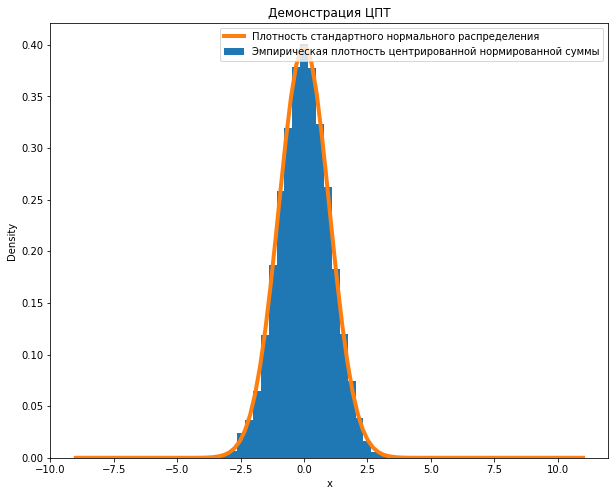

In [81]:
# density

plt.figure(figsize=(10,8))
plt.hist(X, bins=25, density=True, label='Эмпирическая плотность центрированной нормированной суммы')#, histtype='step');
grid = np.linspace(mu -  sigma, mu +  sigma, 100)

theoretical_pdf = stats.norm.pdf(grid, loc = 0, scale = 1)
plt.plot(grid, theoretical_pdf, label='Плотность стандартного нормального распределения', lw=4)

plt.xlabel('x')
plt.ylabel('Density')
plt.title('Демонстрация ЦПТ')

plt.legend();

## Подпункт 5.2 

Доверительный интервал с уровнем доверия $\gamma$ построим с помощью центральной статистики.
Подробно вычисления выпишу в отчёт, здесь представлю результат:
$$
X_i \overset{iid}{\sim} \mathcal{N}(\mu, \sigma^2), i = 1,2,...,n\\
S_1^2 = \frac{1}{n-1}\sum\limits_{i=1}^n (X_i - \overline{X})^2\\
\text{Тогда доверительный интервал для} ~\sigma^2 \text{выглядит так}\\
\frac{n-1}{c_2}S_1^2 < \sigma^2 < \frac{n-1}{c_1}S_1^2, \text{где}~ c_1 = q_{\chi_{n-1}^2}(\frac{1-\gamma}{2}), c_2 = q_{\chi_{n-1}^2}(\frac{1+\gamma}{2})\\
\text{А доверительный интервал для} ~\mu \text{выглядит так}\\
\overline{X} + \frac{S_1a_1}{\sqrt{n}} < \mu < \overline{X} + \frac{S_1a_2}{\sqrt{n}}, \text{где}~ a_1 = q_{t_{n-1}}(\frac{1-\gamma}{2}), a_2 = q_{t_{n-1}}(\frac{1+\gamma}{2})
$$

In [82]:
# Generate sample
N = 10000
mu = 1
sigma = 10
X = stats.norm.rvs(loc = mu, scale = sigma, size=N)
X_mean = X.mean()
S1 = np.sqrt(np.sum((X - X_mean) * (X - X_mean)) / (N - 1))

In [83]:
from scipy.stats import chi2, t

In [84]:
gamma = 0.9 # Доверительный уровень
a_1 = t.ppf((1 - gamma) / 2, df = N - 1)
a_2 = t.ppf((1 + gamma) / 2, df = N - 1)
c_1 = chi2.ppf((1 - gamma) / 2, df = N - 1)
c_2 = chi2.ppf((1 + gamma) / 2, df = N - 1)
sq = math.sqrt(N)
print("Доверительный интервал для среднего значения (%f, %f)" % (X_mean + S1 * a_1 / sq, X_mean + S1 * a_2 / sq))
print("Доверительный интервал для дисперсии (%f, %f)" % ((N - 1) / c_2 * S1, (N - 1) / c_1 * S1) )

Доверительный интервал для среднего значения (0.840900, 1.170056)
Доверительный интервал для дисперсии (9.776159, 10.241770)


## Подпункт 5.3 

Создадим генератор $\frac{S_n}{n}=\frac{\sum\limits_{i=1}^n X_i}{n}, ~\text{где}~ X_i \sim Cauchy(a, b)$
В силу устойчивости распределения Коши средние будут так же иметь распределение Коши с аналогичными параметрами

In [85]:
def CauchyMean(a, b, n):
    X = np.array(CauchyGen(a, b, n))
    return X.mean()

In [86]:
n = 1000
N_tries = 1000
a = 1
b = 10
X = [CauchyMean(a, b, n) for _ in range(N_tries)]

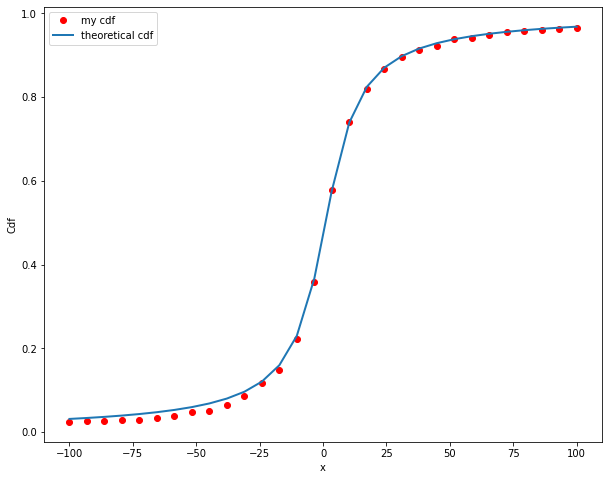

In [87]:
plt.figure(figsize=(10,8))
grid = np.linspace(x_0 - 100, x_0 + 100, 30)

# empirical
emp_cdf = [ (X < y).sum()/N_tries for y in grid]
plt.plot(grid, emp_cdf, 'ro', label='my cdf', lw=2)

# theoretical
theoretical_cdf = stats.cauchy.cdf(grid, a, b)
plt.plot(grid, theoretical_cdf, label='theoretical cdf', lw=2)



plt.xlabel('x')
plt.ylabel('Cdf')

plt.legend();

# Задание 6

## Подпункт 6.1 

Представим подинтегральную функцию в следующем виде:
$$
\frac{e^{-\sum\limits_{i=1}^{10} x_i^2}}{\pi^5}\frac{\pi^5 e^{\frac{-1}{2^7\prod\limits_{i=1}^{10} x_i^2}} }{\prod\limits_{i=1}^{10} x_i^2} = p(x) f(x) , \\ \text{где} ~p(x) =  \frac{e^{-\sum\limits_{i=1}^{10} x_i^2}}{\pi^5} - \text{плотность распределения вектора, состоящего из независимых одинаково распределенных св}. X_i \sim \mathcal{N}(0, \frac{1}{2}).\\
f(x) = \frac{\pi^5 e^{\frac{-1}{2^7\prod\limits_{i=1}^{10} x_i^2}} }{\prod\limits_{i=1}^{10} x_i^2}.
$$

In [88]:
def MonteF(x):
    eps = 0.00001
    tmp = (x**2).prod()
    if tmp < eps:
        return 0
    return math.pi**5 * math.exp(-1 / (2**7 * tmp)) / tmp

### Метод Монте-Карло

In [89]:
dim = 10
N = 1000000

In [90]:
# generate sample
X = stats.norm.rvs(loc = 0, scale = 1 / math.sqrt(2), size=N * dim).reshape(-1, dim)

# count monte-carlo approx of integral
I_monte = np.apply_along_axis(MonteF, 1, X).mean()

In [91]:
I_monte

124.381525

### Метод квадратур 

In [92]:
from math import pi

In [93]:
def F(t):
#     returns f / pi**10
    x = pi * t / 2
    a = (np.tan(x))**2
    b = a.prod()
    a = a.sum()
    c = (np.sin(x).prod())**2
    return np.exp(-(a + 1 / (128 * b))) / c
    

In [94]:
dim = 10
n = 6
N = (n - 1)**dim
a = 1 / (2 * n)
b = 1 - a
lins = [np.linspace(a, b, n - 1) for _ in range(dim)]
points = np.array(np.meshgrid(*lins)).T.reshape(-1, dim)

points

array([[0.08333333, 0.08333333, 0.08333333, ..., 0.08333333, 0.08333333,
        0.08333333],
       [0.08333333, 0.29166667, 0.08333333, ..., 0.08333333, 0.08333333,
        0.08333333],
       [0.08333333, 0.5       , 0.08333333, ..., 0.08333333, 0.08333333,
        0.08333333],
       ...,
       [0.91666667, 0.5       , 0.91666667, ..., 0.91666667, 0.91666667,
        0.91666667],
       [0.91666667, 0.70833333, 0.91666667, ..., 0.91666667, 0.91666667,
        0.91666667],
       [0.91666667, 0.91666667, 0.91666667, ..., 0.91666667, 0.91666667,
        0.91666667]])

In [95]:
I_form = (np.apply_along_axis(F, 1, points) / n**dim).sum() * pi**10

KeyboardInterrupt: 

In [ ]:
print('Аппроксимация интеграла квадратурными формулами равна ', I_form)
print('Аппроксимация интеграла методом Монте-Карла равна ', I_monte)

# Задание 7

## 7.1 Метод случайного поиска

Метод случайного поиска для функции $f(x) = x_1^3\sin{\dfrac{1}{x_1}} + 10x_1x_2^4\cos{\dfrac{1}{x_2}},~~f(0, x_2) = 0,~~f(x_1, 0) = x_1^3\sin{\dfrac{1}{x_1}}$

Для этого будем генерировать случайные величины, распределенные равномерно в А (множестве определения), выбирая из них ту, на которой значение f будет минимально (все оценки точности будут приведены в соответствующем отчёте).

In [96]:
def GenUniformA(size = 1):
    points_x = np.array([])
    points_y = np.array([])
    
    while size > 0:
        curr_x = np.random.uniform(low = -1, high = 1, size = size)
        curr_y = np.random.uniform(low = -1, high = 1, size = size)
        idx = curr_x**2 + curr_y**2 <= 1
        size -= sum(idx)
        points_x = np.concatenate((points_x, curr_x[idx]), axis = 0) 
        points_y = np.concatenate((points_y, curr_y[idx]), axis = 0)
    
    return np.array([points_x, points_y])
        

In [97]:
def StochSearch(eps, alpha):
    delta = eps / 64
    n = int(np.ceil(np.log(alpha) / np.log((np.pi - delta**2)/np.pi)))
    points = GenUniformA(n)
    x = points[0, :]
    y = points[1, :]
    f = x**3 * np.sin(1 / x) + 10 * x * y**4 * np.cos(1/y)
    i = np.argmin(f)
    return [x[i], y[i]]

In [98]:
def f(point):
    x = point[0]
    y = point[1]
    if x**2 + y**2 > 1:
        return np.inf
    if abs(x) < 0.0001:
        return 0
    elif abs(y) < 0.0001:
        return x**3 * np.sin(1/x)
    return x**3 * np.sin(1/x) + 10 * x * y**4 * np.cos(1/y)

In [99]:
eps = 0.05 # желаемая погрешность ответа
delta = eps / 64
alpha = 0.05 # вероятность того, что итоговая погрешность будет больше желаемой

opt_point = StochSearch(eps, alpha)

In [100]:
opt_point

[-0.3578549533920976, -0.9337665602228284]

In [101]:
f(opt_point)

-1.28839741213819

Сравним с тем, что нам дадут классические методы оптимизации

In [102]:
res = (scipy.optimize.minimize(f, x0 = [-0.3, 0.9], method='Powell', tol=1e-8))

/opt/homebrew/lib/python3.9/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


In [103]:
res.x

array([-0.43588975,  0.90000007])

In [104]:
f(res.x)

-1.2067490732207493

Оказывается, что для данной функции классические методы оптимизации сходят с ума и отказываются выдавать хоть сколько-то приличный результат при даже не самом большом отклонении от точки оптимума.

## 7.2 Метод имитации отжига 

In [105]:
def G(point):
    x = point[0]
    y = point[1]
    return (x - 1)**2 + 100 * (y - x**2)**2

In [106]:
def AnnealImitationMethod(gamma = 0.99, T0 = 1, sigma = 1, eps = 0.0000001, need_steps = False):
    N_steps = 0
    N_conversions = 0
    curr_x = np.random.normal(loc = 0.0, scale = sigma * T0, size = 2) # первое приближение
    T = T0
    
    
    while T > eps:
        N_steps += 1
        T *= gamma
        tmp_x = curr_x + np.random.normal(loc = 0.0, scale = sigma * np.sqrt(T), size = 2)
        
        deltaG = G(tmp_x) - G(curr_x)
        
        if (deltaG < 0) or (np.random.uniform() < np.exp(-deltaG / T)):
            curr_x = tmp_x
            N_conversions += 1
    
    if need_steps:
        return curr_x, N_steps, N_conversions
    return curr_x   

In [107]:
N_tries = 30
N = 100
Solutions = [AnnealImitationMethod() for _ in range(N_tries * N)]

In [108]:
Solutions = np.array(Solutions)

In [109]:
Errors = np.sqrt(((Solutions - 1)**2).sum(axis = 1)).reshape(N, N_tries)

In [110]:
Errors = Errors.mean(axis = 1)

In [111]:
ErrMean = Errors.mean()

Предположим, погрешность решения случайная величина с конечным матожиданием $\mu$ и конечной дисперсией.
Тогда распределение среднего значения первых N таких случайных величин можно приблизить распределением нормального с параметрами $\mu, D < \infty$

Теперь рассмотрим выборку получившихся усреднений погрешностей $X_1, X_2,..., X_n$. Они независимы и одинаково распределены. Следовательно, доверительный интервал для дисперсии погрешности уровня $\alpha$ будет выглядеть, как 
$$
S_1^2 = \frac{1}{n-1}\sum\limits_{i=1}^n (X_i - \overline{X})^2\\
\overline{X} + \frac{S_1a_1}{\sqrt{n}} < \mu < \overline{X} + \frac{S_1a_2}{\sqrt{n}}, \text{где}~ a_1 = q_{t_{n-1}}(\frac{1-\gamma}{2}), a_2 = q_{t_{n-1}}(\frac{1+\gamma}{2})
$$

In [112]:
S1 = np.sqrt(np.sum((Errors - ErrMean) * (Errors - ErrMean)) / (N_tries - 1))

In [113]:
gamma = 0.99 # Доверительный уровень
a_1 = t.ppf((1 - gamma) / 2, df = N_tries - 1)
a_2 = t.ppf((1 + gamma) / 2, df = N_tries - 1)
sq = math.sqrt(N_tries)
print("Доверительный интервал для среднего значения ошибки (%f, %f)" % (ErrMean + S1 * a_1 / sq, ErrMean + S1 * a_2 / sq))

Доверительный интервал для среднего значения ошибки (0.013045, 0.128205)


In [114]:
Solutions

array([[1.28672726, 1.65646738],
       [0.99879413, 0.99762073],
       [1.00001031, 1.00004652],
       ...,
       [0.9985465 , 0.99711864],
       [0.99980919, 0.99964983],
       [1.03428712, 1.06988012]])

# Задание 8

In [115]:
N = 100

In [116]:
N = N // 2 * 2 + 1
x_grid = np.linspace(-1, 1, N)
y_grid = np.linspace(-1, 1, N)

In [117]:
Count = np.zeros((N, N))
ApproxU = np.zeros((N, N))

In [118]:
def f(x, y):
    return x**2 - y**2

def U(x, y):
    return x**2 - y**2

In [119]:
delta = 2 / (N - 1)

# initialize pos
i = N // 2
j = 0
x = x_grid[i]
y = y_grid[j]
curr_temp = f(x, y)


K = 1000 # количество столкновений с границей
while K > 0:
    direc = []
  
    if (x + delta)**2 + y**2 <= 1:
        # right
        direc.append(0)
    if (x - delta)**2 + y**2 <= 1:
        # left
        direc.append(2)
    if (y + delta)**2 + x**2 <= 1:
        # up
        direc.append(1)
    if (y - delta)**2 + x**2 <= 1:
        # down
        direc.append(3)
    
    if (x**2 + y**2 <= 1) and ((abs(x) + delta)**2 + y**2 > 1) and ((abs(y) + delta)**2 + x**2 > 1):
        # board
        curr_temp = f(x, y)
        ApproxU[i][j] = curr_temp    
        K -= 1
    else:
        # change ApproxU
        Count[i][j] += 1
        ApproxU[i][j] = (1 - 1 / Count[i][j]) * ApproxU[i][j] + curr_temp / Count[i][j]    
        
    # choose direction
    change_pos = np.random.choice(direc)
    
    if change_pos == 0:
        # right
        i += 1
    elif change_pos == 1:
        # up
        j += 1
    elif change_pos == 2:
        # left
        i -= 1
    else:
        # down
        j -= 1        
    
    x = x_grid[i] 
    y = y_grid[j]



In [120]:
X, Y = np.meshgrid(x_grid, y_grid)

In [121]:
AnaliticU = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        if x_grid[i]**2 + y_grid[j]**2 < 1:
            AnaliticU[i][j] = U(x_grid[i], y_grid[j])

Text(0.5, 0, 'y')

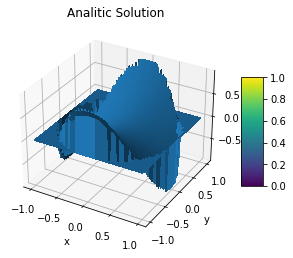

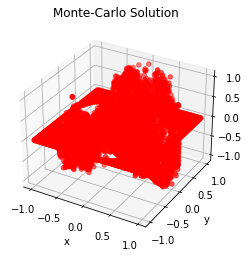

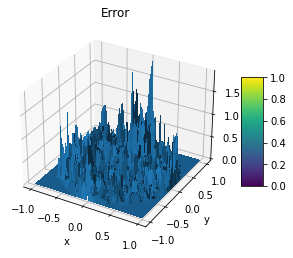

In [122]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

surf = ax.plot_surface(X, Y, AnaliticU,
                       linewidth=0, antialiased=False)
plt.title('Analitic Solution')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.xlabel('x')
plt.ylabel('y')

fig = plt.figure()
abx = fig.add_subplot(projection='3d')
abx.scatter(X, Y, ApproxU, color = 'r')
plt.title('Monte-Carlo Solution')
plt.xlabel('x')
plt.ylabel('y')


fig2 = plt.figure()

ax = fig2.add_subplot(projection='3d')
surf2 = ax.plot_surface(X, Y, np.abs((AnaliticU - ApproxU)),
                       linewidth=0, antialiased=False)
fig2.colorbar(surf2, shrink=0.5, aspect=5)
plt.title('Error')
plt.xlabel('x')
plt.ylabel('y')

In [123]:
(np.abs((AnaliticU - ApproxU))).mean()

0.16350113124346055

# Задание 9

До того, как заботал Орнштейна-Уленбека

https://www.youtube.com/watch?v=5EdkZbh3vtI&ab_channel=%D0%A1%D0%9C%D0%9E%D0%A2%D0%A0%D0%98%D0%9C%D0%BA%D0%B8%D0%BD%D0%BE%D0%B8%D1%81%D0%B5%D1%80%D0%B8%D0%B0%D0%BB%D1%8B

## Подпункт 9.1 (Винеровский процесс)

$W(t), t \in [0, 1] - \text{винеровский процесс}.$ Генерировать будем так:

$$
\mathbb{P}(W(0) = 0) = 1,
W(1) \sim \mathcal{N}(0, 1),\\
\text{Если} ~W(t_1) = x_1, W(t_2) = x_2, t_2 > t_1, \text{то} ~W(\frac{t_1 + t_2}{2}) \sim \mathcal{N}(\frac{x_1 + x_2}{2}, \frac{t_2 - t_1}{4}) 
$$

Объяснение того, почему процесс, полученный таким образом, действительно будет винеровским, приведу в отчёте.

In [124]:
N = 1049

In [125]:
N = 2**(int(np.log(N) / np.log(2)))

In [126]:
t = np.linspace(0, 1, N + 1)
W = np.zeros(N + 1)

In [127]:
W[N - 1] = NeymanNormGen(mu = 0, sigma = 1)[0]

In [128]:
def FillTheW(a, b):
    global W
    global t
    x1 = W[a]
    x2 = W[b]
    t1 = t[a]
    t2 = t[b]
    if b > a + 1:
        W[(b + a) // 2] = NeymanNormGen(mu = (x1 + x2) / 2, sigma = np.sqrt((t2 - t1) / 4))[0]
        FillTheW(a, (b + a) // 2)
        FillTheW((b + a) // 2, b)

In [129]:
FillTheW(0, N)

Text(0, 0.5, 'W(t)')

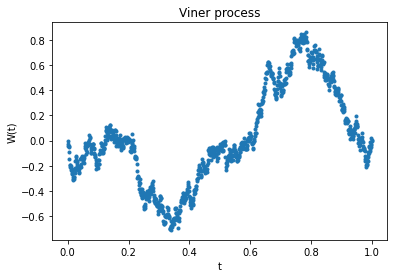

In [130]:
plt.plot(t, W, '.')
plt.title('Viner process')
plt.xlabel('t')
plt.ylabel('W(t)')

   ## Подпункт 9.2 (Страшный и ужасный господин ОУ)

$$
W(t) - \text{процесс О-У}, t \in [0, 1], \newline
W(0) \sim \mathcal{N}(0, \sigma^2), W(1) \sim \mathcal{N} (x_0 e^{-\lambda}, \sigma^2(1-e^{-2\lambda})), \newline
W(\frac{t_1 + t_2}{2}) \sim \mathcal{N}((x_1 + x_2) \frac{e^{-\frac{\lambda(t_2 - t_1)}{2}})}{1 + e^{-\lambda(t_2 - t_1)}}, \sigma^2 \frac{1 - e^{-\lambda(t_2 - t_1)}}{1 + e^{-\lambda(t_2 - t_1)}} )
$$

In [131]:
N = 1049
sigma = 2
lamb = 1

In [132]:
N = 2**(int(np.log(N) / np.log(2)))

In [133]:
t = np.linspace(0, 1, N + 1)
W = np.zeros(N + 1)

In [134]:
W[0] = NeymanNormGen(mu = 0, sigma = sigma)[0]

In [135]:
W[N - 1] = NeymanNormGen(mu = W[0] * np.exp(-lamb), sigma = sigma * np.sqrt(1 - np.exp(-2 * lamb)))[0]

In [136]:
def FillTheWOU(a, b):
    global W
    global t
    x1 = W[a]
    x2 = W[b]
    t1 = t[a]
    t2 = t[b]
    if b > a + 1:
        W[(b + a) // 2] = NeymanNormGen(mu = (x1 + x2) * (np.exp(-lamb * (t2 - t1) / 2)) / (1 + np.exp(-lamb * (t2 - t1))),
                                        sigma = sigma * np.sqrt((1 - np.exp(-lamb * (t2 - t1))) / (1 + np.exp(-lamb * (t2 - t1)))) )[0]
        FillTheW(a, (b + a) // 2)
        FillTheW((b + a) // 2, b)

In [137]:
FillTheWOU(0, N)

Text(0, 0.5, 'W(t)')

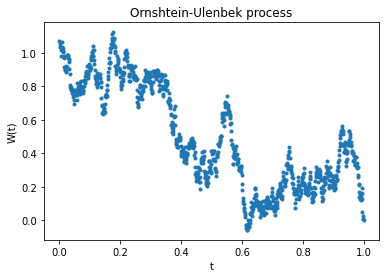

In [138]:
plt.plot(t, W, '.')
plt.title('Ornshtein-Ulenbek process')
plt.xlabel('t')
plt.ylabel('W(t)')

После того, как заботал Орнштейна-Уленбека:

https://www.youtube.com/watch?v=XcLPswy9JfY&ab_channel=DrBurdock

# Задание 10

In [139]:
r = 0.1 # var of error
sigma = 1 # var of x1
lamb = 50
N = 1000
a = np.exp(-lamb / (N - 1))
q = sigma**2 * (1 - a**2)

In [140]:
t = np.linspace(0, 1, N)
real_x = np.zeros(N)
real_x[0] = NeymanNormGen(mu = 0, sigma = sigma)[0]
for i in range(1, N):
    real_x[i] = a * real_x[i - 1] + NeymanNormGen(mu = 0, sigma = np.sqrt(q))[0]

y = real_x + NeymanNormGen(mu = 0, sigma = np.sqrt(r), size = N)



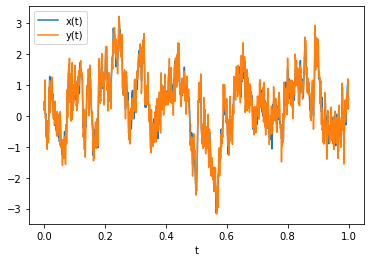

In [141]:
plt.plot(t, real_x, label = 'x(t)')
plt.plot(t, y, label = 'y(t)')
plt.xlabel('t')
plt.legend()

In [142]:
x_appr = np.zeros(N)
R1 = sigma**2 # R_k_(k-1)
R2 = R1 - R1**2 / (R1 + q)
x_appr[0] = R1 / (R1 + q) * y[0]
for i in range(1, N):
    R1 = a**2 * R2 + r
    R2 = R1 - R1**2 / (R1 + q)
    
    x_prev_appr = a * real_x[i - 1]
    x_appr[i] = x_prev_appr + R1 / (R1 + q) * (y[i] - x_prev_appr)    

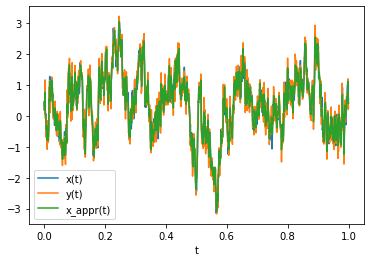

In [185]:
plt.plot(t, real_x, label = 'x(t)')
plt.plot(t, y, label = 'y(t)')
plt.plot(t, x_appr, label = 'x_appr(t)')
plt.xlabel('t')
plt.legend()

In [144]:
print('Погрешность до фильтра Калмана')
(abs(y - real_x)).mean()

Погрешность до фильтра Калмана


0.2580304710351693

In [145]:
print('Погрешность после применения фильтра Калмана')
(abs(x_appr - real_x)).mean()

Погрешность после применения фильтра Калмана


0.17913577537323105

Когда фильтр Калмана уменьшил погрешность на 25%: (Материалы по фильтру Калмана)
https://drive.google.com/file/d/1RSjoZhgYGlK3vJw4vZY3851E4-d79fZE/view?usp=share_link

In [188]:
pip install simpleaudio

In [189]:
import simpleaudio as sa
# НЕОБХОДИМО ЗАПУСТИТЬ ЯЧЕЙКУ
wave_obj = sa.WaveObject.from_wave_file("./Voice 001.wav")
play_obj = wave_obj.play()
play_obj.wait_done()

# Задание 11

   ## Подпункт 11.1 (СМО)

In [190]:
def Chi2(n = 10):
    return sum(NormPolarOptimizeGen(mu = 0, sigma = 1, size = n)**2)

In [289]:
def SMS(a, T): # a - intensivity
    t = [0]
    q_sizes = [0]
    q = []
    t_new = ExpGen(a)[0]
    
    while t[-1] < T:
        if (q) and (q[0] <= t_new):
            # exit
            t.append(q[0])
            q_sizes.append(q_sizes[-1] - 1)
            q.pop(0)
        else:
            # enter
            t.append(t_new)
            t_new += ExpGen(a)[0]
            q_sizes.append(q_sizes[-1] + 1)
            if (q):
                q.append(q[-1] + Chi2(10))
            else:
                q = [Chi2(10) + t[-1]]
    
    return t, q_sizes
            
       

True

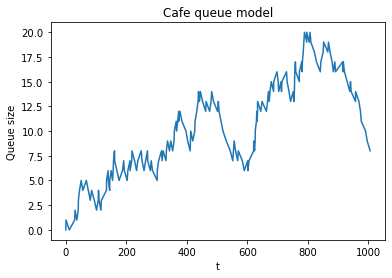

In [321]:
x, y = SMS(0.1, 1000)
plt.plot(x, y)
plt.xlabel('t')
plt.ylabel('Queue size')
plt.title('Cafe queue model')
sorted(x) == x

Так как матожидание экспоненциальной случайной величины с параметром $\lambda$ равно $\frac{1}{\lambda}$, то при $\lambda > 0.1$ очередь будет нарастать, при $0 < \lambda \leqslant 0.1$ кафе будет нормально справляться с потоком клиентов.

## Подпункт 11.2 (СМО с циклической интенсивностью) 

In [350]:
def NewPersComeTimeGen(a, t):
    res = ExpGen(2 * a)[0]
    p = (1 + np.cos(t)) / 2
    if p < 0.001:
        p = 0.001
    while not Bernoulli(p):
        res = ExpGen(2 * a)[0]
    
    return res
    

In [351]:
def CycleSMS(a, T): # a - intensivity
    t = [0]
    q_sizes = [0]
    q = []
    t_new = NewPersComeTimeGen(a, 0)
    
    while t[-1] < T:
        if (q) and (q[0] <= t_new):
            # exit
            t.append(q[0])
            q_sizes.append(q_sizes[-1] - 1)
            q.pop(0)
        else:
            # enter
            t.append(t_new)
            t_new += NewPersComeTimeGen(a, t_new)
            q_sizes.append(q_sizes[-1] + 1)
            if (q):
                q.append(q[-1] + Chi2(10))
            else:
                q = [Chi2(10) + t[-1]]
    
    return t, q_sizes
            
       

Text(0.5, 1.0, 'Cafe queue cycle model')

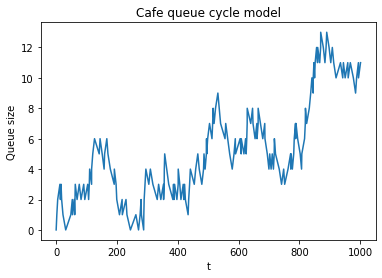

In [364]:
x, y = CycleSMS(0.05, 1000)
plt.plot(x, y)
plt.xlabel('t')
plt.ylabel('Queue size')
plt.title('Cafe queue cycle model')


## Подпункт 11.3 (Страховая компания) 

In [342]:
def ParetoGen(x0, k):
    if (x0 <= 0) or (k <= 0):
        print('AAAAAAAAAAAAAA')
        raise 1
    
    y = np.random.uniform()
    while abs(y) < 0.0001:
        y = np.random.uniform()
    
    return x0 / y**(1 / k)

In [420]:
def RiskComp(a, c, W0, xm, k, T):
    # a > 0, c > 0, W0 > 0, xm > 0, k > 0
    W = [W0]
    t = [0]
    
    while (t[-1] < T) and (W[-1] > 0):
        dt = ExpGen(a)[0]
        sum_of_insurance = ParetoGen(xm, k)
        new_t = t[-1] + dt
        t.append(new_t)
        t.append(new_t)
        W.append(W[-1] + c * dt)
        W.append(W[-1] - sum_of_insurance)
    
    if W[-1] < 0:
        print('Вы обанкротились')
    return t, W

Вы обанкротились


Text(0.5, 1.0, 'Capital Graphic')

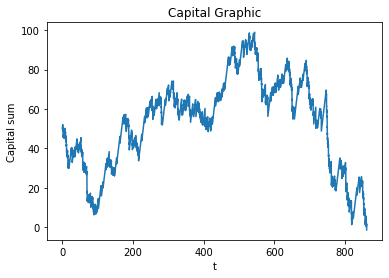

In [421]:
x, y = RiskComp(a = 0.42, c = 1.5, W0 = 50, xm = 3, k = 7, T = 1000)
plt.plot(x, y)
plt.xlabel('t')
plt.ylabel('Capital sum')
plt.title('Capital Graphic')